<font size = 6> <b> Проект по SQL </b></font>

## Цель исследования

В данном проекте с помощью SQL-запросов анализируются данные о рынке книг (книги, издательства, авторы, пользовательские обзоры. Заказчик - компания, которая купила крупный сервис для чтения книг по подписке. После пандемии COVID-19 мир изменился, люди стали больше времени проводить дома, в том числе за чтением книг. На рынке образовалась ниша в сфере стартапов - приложений для чтения книг. В 2022-2025 гг. стремление к самообразованию будет расти. Все больше людей интересуются новыми направлениями, хотят кардинально поменять сферу деятельности. Поэтому сейчас востребована литература по теме бизнеса, психологии, быстрого входа в новую профессию. К тому же, книги читают для удовольствия, развлечения, общего развития. Несмотря на глобальную диджитализацию спрос на печатную книжную продукцию по-прежнему высок. В интернет-магазинах успешно продаются в том числе электронные и аудиоформаты.

**Цель исследования** - проанализировать базу данных с целью выявления трендов рынка. Эти данные помогут сформулировать ценностное предложение для нового продукта.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sqlalchemy import create_engine 

pd.set_option('display.float_format', '{:,.2f}'.format) #настройки pandas для отображения чисел без лишних запятых
pd.set_option("max_colwidth", 200) #настройки pandas для отображения строк полностью

In [2]:
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных

In [3]:
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db']) 

In [4]:
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

## Описание данных

### Таблица books

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

In [5]:
pd.io.sql.read_sql('SELECT * FROM books', con = engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope #1),322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before Columbus,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
...,...,...,...,...,...,...
995,996,571,Wyrd Sisters (Discworld #6; Witches #2),265,2001-02-06,147
996,997,454,Xenocide (Ender's Saga #3),592,1996-07-15,297
997,998,201,Year of Wonders,358,2002-04-30,212
998,999,94,You Suck (A Love Story #2),328,2007-01-16,331


In [6]:
pd.io.sql.read_sql('SELECT * FROM books', con = engine).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


### Таблица authors

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

In [7]:
pd.io.sql.read_sql('SELECT * FROM authors;', con = engine)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
...,...,...
631,632,William Strunk Jr./E.B. White
632,633,Zadie Smith
633,634,Zilpha Keatley Snyder
634,635,Zora Neale Hurston


### Таблица publishers

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

In [8]:
pd.io.sql.read_sql('SELECT * FROM publishers;', con = engine)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
...,...,...
335,336,Workman Publishing Company
336,337,Wyatt Book
337,338,Yale University Press
338,339,Yearling


### Таблица ratings

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

In [9]:
pd.io.sql.read_sql('SELECT * FROM ratings;', con = engine)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
...,...,...,...,...
6451,6452,1000,carolrodriguez,4
6452,6453,1000,wendy18,4
6453,6454,1000,jarvispaul,5
6454,6455,1000,zross,2


### Таблица reviews

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

In [10]:
pd.io.sql.read_sql('SELECT * FROM reviews;', con = engine)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. Over provide race technology continue these.
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Among admit investment argue security.
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but person sport treatment industry. Kitchen decision deep the. Social party body the.
3,4,3,johnsonamanda,Finally month interesting blue could nature cultural bit. Prepare beat finish grow that smile teach. Dream me play near.
4,5,3,scotttamara,Nation purpose heavy give wait song will. List dinner another whole positive radio fast. Music staff many green.
...,...,...,...,...
2788,2789,999,martinadam,Later hospital turn easy community. Fact same enter true practice student system.
2789,2790,1000,wknight,Change lose answer close pressure. Spend so now.
2790,2791,1000,carolrodriguez,Authority go who television entire hair guy population. Pm vote take. Long born close thought person old. Visit ever school manage about.
2791,2792,1000,wendy18,Or western offer wonder ask. More hear phone foreign amount within cell. Ball poor hot that kid.


## Проведение SQL-запросов

### Количество книг, вышедших после 1 января 2000 г.

Посчитаем, сколько книг вышло после 1 января 2000 года:

In [11]:
query1 = '''SELECT COUNT (book_id)
         FROM books 
         WHERE books.publication_date >= '2000-01-01';
         '''

pd.io.sql.read_sql(query1, con = engine)

,count
0,821


После 1 января 2000 г. была опубликована 821 книга. Из всей подборки книг (1000 шт.) это большое значение. Возможно, интернет-магазину книг стоит продолжать закупать современные книги и позиционировать себя соответствующим образом.

### Количество обзоров и средняя оценка для каждой книги

Для каждой книги посчитаем количество обзоров и среднюю оценку:

In [12]:
query2 = '''
        SELECT 
            books.title AS title,
            books.book_id AS id,
            AVG(ratings.rating) AS avg_rating,
            COUNT(DISTINCT reviews.text) AS number_of_reviews
        FROM
            books
        INNER JOIN ratings ON ratings.book_id = books.book_id
        LEFT JOIN reviews ON reviews.book_id = books.book_id
        GROUP BY
             books.title,
             books.book_id
        order by
             number_of_reviews DESC
        
        '''

pd.io.sql.read_sql(query2, con = engine)

,title,id,avg_rating,number_of_reviews
0,Twilight (Twilight #1),948,3.66,7
1,Water for Elephants,963,3.98,6
2,The Glass Castle,734,4.21,6
3,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),302,4.41,6
4,The Curious Incident of the Dog in the Night-Time,695,4.08,6
...,...,...,...,...
995,Anne Rice's The Vampire Lestat: A Graphic Novel,83,3.67,0
996,The Natural Way to Draw,808,3.00,0
997,The Cat in the Hat and Other Dr. Seuss Favorites,672,5.00,0
998,Essential Tales and Poems,221,4.00,0


In [13]:
pd.io.sql.read_sql(query2, con = engine)['number_of_reviews'].sum()

2793

In [14]:
pd.io.sql.read_sql(query2, con = engine)[pd.io.sql.read_sql(query2, con = engine)['number_of_reviews'] == 0]

,title,id,avg_rating,number_of_reviews
994,Leonardo's Notebooks,387,4.00,0
995,Anne Rice's The Vampire Lestat: A Graphic Novel,83,3.67,0
996,The Natural Way to Draw,808,3.00,0
997,The Cat in the Hat and Other Dr. Seuss Favorites,672,5.00,0
998,Essential Tales and Poems,221,4.00,0
999,Disney's Beauty and the Beast (A Little Golden Book),191,4.00,0


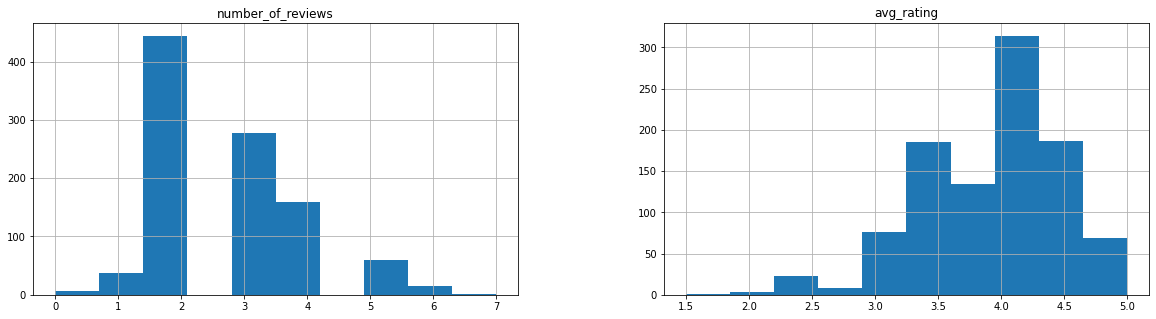

In [15]:
pd.io.sql.read_sql(query2, con = engine)[['number_of_reviews', 'avg_rating']].hist(figsize=(20,5))
plt.show()

Выводы:
* Большинство книг имеет небольшое количество отзывов (1,5 - 2 шт.) Пользователи оставляют отзывы, только если книга оставила сильные впечатления. Максимальное количество отзывов - 7 (у книги Twilight (Twilight #1))
* Преобладают высокие оценки, т.е. гистограмма распределения смещена вправо. Чаще всего книги получают оценку 4-4.5 балла из 5.

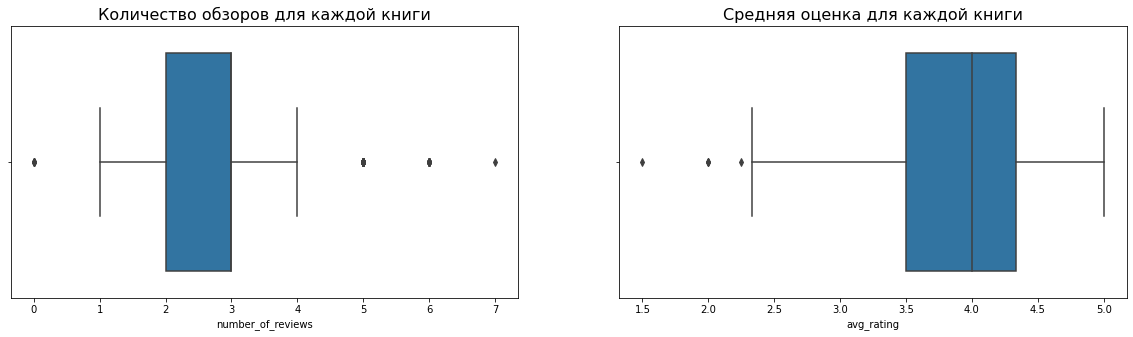

In [16]:
fig = plt.figure(figsize=(20,5))

ax1 = plt.subplot2grid((1,2),(0,0))
sns.boxplot(x=pd.io.sql.read_sql(query2, con = engine)['number_of_reviews'])
#plt.xlim(0, 50)
plt.title('Количество обзоров для каждой книги', fontsize = 16)

ax1 = plt.subplot2grid((1, 2), (0, 1))
sns.boxplot(x=pd.io.sql.read_sql(query2, con = engine)['avg_rating'])
plt.title('Средняя оценка для каждой книги', fontsize = 16)

plt.show()

Выводы по ящикам с усами:
  * Видим выбросы в количестве обзоров: аномальные значения слева  - 0 обзоров, справа - 5-7 обзоров.
  * Низкие оценки книг встречаются редко и являются аномалиями.

### Издательство, которое выпустило наибольшее число книг толще 50 страниц

Определим издательство, которое выпустило наибольшее число книг толще 50 страниц — так исключим из анализа брошюры.

In [17]:
query3 = '''SELECT p.publisher_id, publisher, count(b.book_id)
            FROM books as b
            JOIN publishers as p on b.publisher_id = p.publisher_id
            WHERE b.num_pages > 50  
            group by p.publisher_id
            order by count DESC
            LIMIT 1

            '''

pd.io.sql.read_sql(query3, con = engine)

,publisher_id,publisher,count
0,212,Penguin Books,42


**Вывод:** Издательство Penguin Books опубликовало 42 книги (и все они имеют 50 страниц, не являются брошюрами). Интернет-магазину стоит следить за свежими выпусками книг от этого издательства и закупать их.

### Автор с самой высокой средней оценкой книг среди книг с 50 и более оценками

Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

In [19]:
query4 = '''WITH 

            g AS
            (SELECT
                authors.author AS author,
                books.book_id AS id,
                AVG(ratings.rating) AS avg_rating,
                COUNT(ratings.rating) AS cnt_rating
            FROM
                authors
            INNER JOIN books ON books.author_id = authors.author_id
            INNER JOIN ratings ON ratings.book_id = books.book_id
            GROUP BY
                author,
                id
                HAVING
                COUNT(ratings.rating) >= 50) 
            
        SELECT
            g.author AS author,
            AVG(g.avg_rating) AS avg_rating
        FROM g
        
        GROUP BY
            author
        ORDER BY
            avg_rating DESC
        LIMIT 1
        '''

pd.io.sql.read_sql(query4, con = engine)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.28


Автор J.K. Rowling/Mary GrandPré имеет самую высокую оценку книг (4.28) среди книг с большим количеством оценок (больше 50), то есть можно считать автора признанным и любимым читателями. Интернет-магазин может закупать больше книг этой писательницы, они наверняка понравятся читателю. Гарри Поттер популярен до сих пор

### Среднее количество обзоров от пользователей, которые поставили больше 50 оценок

Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок:

In [22]:
query5 = ''' WITH
             users as 

             (SELECT username, COUNT(rating_id)
                 FROM ratings
                 GROUP BY username
                 HAVING COUNT(rating_id) > 50)
             
             SELECT AVG(number_of_reviews) AS avg_number_of_reviews
             FROM

             (SELECT COUNT(r.review_id) as number_of_reviews
                 FROM users
                 JOIN reviews as r on r.username = users.username
                 GROUP BY r.username) AS number_of_reviews;
                 
             '''

pd.io.sql.read_sql(query5, con = engine)

,avg_number_of_reviews
0,24.33


Получилось среднее значение количества обзоров от пользователей, поставивших более 50 оценок, равное 24.33.